<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/M7_Py_ML_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

This dataset presents health insurance costs, with each row representing an individual and their associated attributes. Let's break down the columns:

*   **age:** The age of the individual (numeric).
*   **is_male:** A boolean indicating whether the individual is male (TRUE) or female (FALSE).
*   **bmi:** Body Mass Index, a measure of body fat based on height and weight (numeric).
*   **bloodpressure:** Systolic blood pressure (numeric).
*   **diabetic:** A boolean indicating whether the individual is diabetic (TRUE) or not (FALSE).
*   **children:** The number of children the individual has (numeric).
*   **smoker:** A boolean indicating whether the individual is a smoker (TRUE) or not (FALSE).
*   **claim:** The amount of the insurance claim or medical expenses (numeric). This is likely the target variable you'd want to predict.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/demographics.csv')
df.head(3)

,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim
0,39,True,23.2,91,True,0,False,1121.87
1,24,True,30.1,87,False,0,False,1131.51
2,19,True,41.1,100,False,0,False,1146.80


PCA simplifies complex data by reducing its dimensions. It finds the most important features that capture the most variance in the data. Imagine describing a cloud - you could measure many things, but some are more important than others. PCA finds those key measurements. It looks for directions with the most spread (variance), called principal components. By keeping only the top few, you reduce complexity while preserving important information. This helps with visualization, noise removal, and improving performance of machine learning algorithms. It's used in image compression, facial recognition, and finance.

![](http://www.billconnelly.net/wp-content/uploads/2021/05/PCA1-smaller-smaller.gif)

Let's reduce the dimensionality of the 'bmi', 'bloodpressure', 'diabetic', and 'smoker' columns of the DataFrame df to a single principal component, storing the result in pca1.

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
pca1 = pca1.fit_transform(df[['bmi', 'bloodpressure', 'diabetic', 'smoker']])
pca1

array([[-3.96922345],
       [-7.20971262],
       [ 6.88770503],
       ...,
       [-2.74972123],
       [11.72650493],
       [ 8.56825067]])

Now let's reduce the dimensionality of the 'age', 'is_male', and 'children' columns of the DataFrame df to a single principal component, storing the result in pca2.

In [ ]:
pca2 = PCA(n_components=1)
pca2 = pca2.fit_transform(df[['age','is_male','children']])
pca2

array([[  0.90786693],
       [-14.08971132],
       [-19.08890407],
       ...,
       [ -8.0993153 ],
       [ -1.09181017],
       [ -8.07294338]])

Let's then create a new dataframe with this 3 components only, claim, health, and demographics

In [ ]:
df_new = pd.DataFrame(df['claim'])
df_new['health'] = pca1
df_new['demog'] = pca2
df_new

,claim,health,demog
0,1121.87,-3.969223,0.907867
1,1131.51,-7.209713,-14.089711
2,1146.80,6.887705,-19.088904
3,1149.40,-6.828382,-18.089066
4,1163.46,5.184686,-8.090680
...,...,...,...
1327,55135.40,-5.625667,5.924796
1328,58571.07,26.466236,20.919496
1329,60021.40,-2.749721,-8.099315
1330,62592.87,11.726505,-1.091810


Now we have to re-execute the KMean, and present again the scatter plots. Let's leverage painplot to speed up this.

Here we can see the relationships between 'claim', 'health', and 'demog' across three clusters. 'Claim' is right-skewed, while 'health' and 'demog' appear normally distributed. There's some correlation between 'claim' and both 'health' and 'demog'. While the clusters show some separation in the scatter plots, indicating partial distinction based on these variables, there's also overlap, suggesting other factors contribute to cluster formation. Further analysis is needed to fully understand the cluster characteristics.

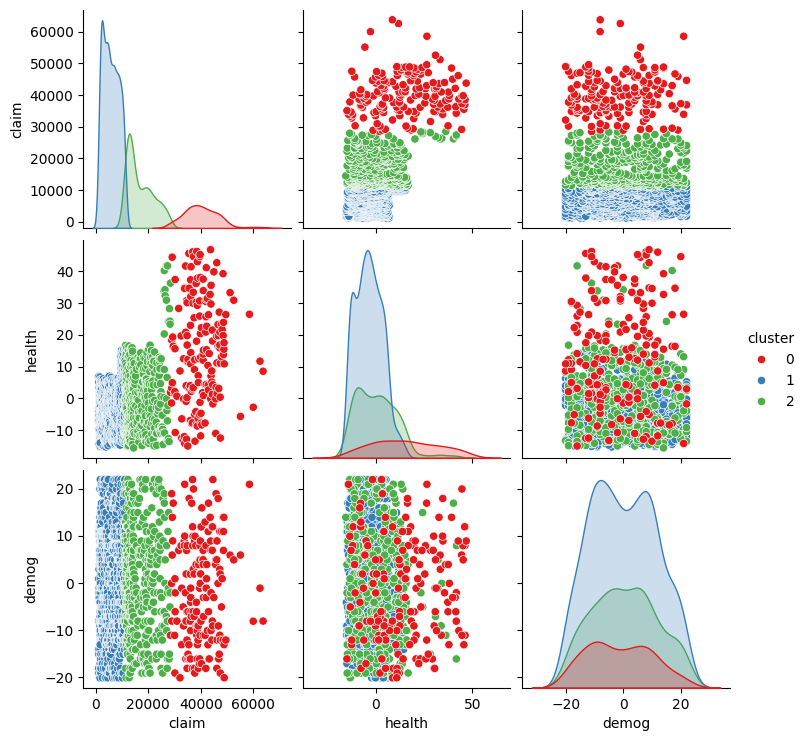

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_new)
df_new['cluster'] = kmeans.labels_
sns.pairplot(df_new, hue='cluster',palette='Set1')

# Challenge: PCA and clustering

A credit card company seeks to improve its marketing effectiveness by understanding its customer base. The task is to segment credit card customers using cluster analysis on provided behavioral data. Students should evaluate the impact of Principal Component Analysis (PCA) on the clustering results, determine the optimal number of clusters, and provide a detailed interpretation of each cluster's characteristics to inform targeted marketing strategies.

- **data**: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/customer%20-%20segmentation.csv`

This data presents credit card customer data, likely for the purpose of customer segmentation or credit risk analysis. Here's a breakdown of the columns:

*   **CUST_ID:** (Categorical) Unique identifier for each customer. (e.g., C10001, C10002)

*   **BALANCE:** (Numerical) Customer's account balance. (e.g., 40.900749, 3202.467416)

*   **BALANCE_FREQUENCY:** (Numerical) How often the balance is updated (1 = frequently, 0 = never). Represents the proportion of months the balance was updated. (e.g., 0.818182, 0.909091)

*   **PURCHASES:** (Numerical) Total amount of purchases made by the customer. (e.g., 95.4, 0)

*   **ONEOFF_PURCHASES:** (Numerical) Total amount of one-off (large) purchases. (e.g., 0, 0)

*   **INSTALLMENTS_PURCHASES:** (Numerical) Total amount of purchases made in installments. (e.g., 95.4, 0)

*   **CASH_ADVANCE:** (Numerical) Cash withdrawn in advance by the user. (e.g., 0, 6442.945483)

*   **PURCHASES_FREQUENCY:** (Numerical) How often purchases are made (1 = frequently, 0 = never). Represents the proportion of months the customer made purchases. (e.g., 0.166667, 0)

*   **ONEOFF_PURCHASES_FREQUENCY:** (Numerical) How often one-off purchases are made. Represents the proportion of months the customer made one-off purchases. (e.g., 0, 0)

*   **PURCHASES_INSTALLMENTS_FREQUENCY:** (Numerical) How often installment purchases are made. Represents the proportion of months the customer made installment purchases. (e.g., 0.083333, 0)

*   **CASH_ADVANCE_FREQUENCY:** (Numerical) How often cash advances are used. Represents the proportion of months the customer took a cash advance. (e.g., 0, 0.25)

*   **CASH_ADVANCE_TRX:** (Numerical) Number of transactions made with cash advance. (e.g., 0, 4)

*   **PURCHASES_TRX:** (Numerical) Number of purchase transactions made. (e.g., 2, 0)

*   **CREDIT_LIMIT:** (Numerical) Credit limit for the user. (e.g., 1000, 7000)

*   **PAYMENTS:** (Numerical) Total amount of payments made by the customer. (e.g., 201.802084, 4103.032597)

*   **MINIMUM_PAYMENTS:** (Numerical) Minimum amount of payments due by the customer. (e.g., 139.509787, 1072.340217)

*   **PRC_FULL_PAYMENT:** (Numerical) Percentage of full payment paid by the customer. (e.g., 0, 0.222222)

*   **TENURE:** (Numerical) Tenure of credit card service for the customer (in months). (e.g., 12, 12)


# Activity: PCA and clustering

Perform a clustering analysis on the auto insurance dataset, incorporating Principal Component Analysis (PCA) for dimensionality reduction. The goal is to identify distinct customer segments to support business decisions like personalized marketing, risk assessment, and policy optimization. Start by preprocessing the data, including encoding categorical features (e.g., `vehicle_type`, `driver_gender`) and scaling numerical variables (e.g., `driver_age`, `annual_mileage`). Use PCA to reduce dimensionality while retaining maximum variance, then apply clustering algorithms such as K-Means or Hierarchical Clustering on the reduced dataset. Analyze the resulting clusters to uncover patterns, such as high claim frequency or low-risk drivers, and evaluate the clustering quality using metrics like Silhouette Score. Provide a concise report with visualizations of the PCA-transformed clusters, key insights, and actionable recommendations, along with the Python implementation of your analysis.

**data**: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/clustering%20-%20auto.csv`



The dataset contains demographic and vehicle-related attributes, as well as historical claim information. Key attributes include:  
- **Driver's Age** (`driver_age`): The age of the policyholder.  
- **Driver's Gender** (`driver_gender`): Gender of the policyholder.  
- **Dependents** (`dependents`): Number of dependents supported by the policyholder.  
- **Risk Behavior** (`risk_behavior`): Whether the policyholder exhibits risky behaviors (e.g., smoking).  
- **Auto Claim Amount** (`auto_claim_amount`): The amount of claims made by the policyholder.  
- **Vehicle Type** (`vehicle_type`): Category of the insured vehicle.  
- **Vehicle Age** (`vehicle_age`): Age of the vehicle in years.  
- **Annual Mileage** (`annual_mileage`): Total miles driven annually.  
- **Claims Frequency** (`claims_frequency`): Number of claims filed annually.  
